In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as axes
import seaborn as sns
from IPython.display import display

In [2]:
#read all files
agro_df = pd.read_csv("./Agrofood_co2_emission.csv")
countries_df = pd.read_csv("./wikipedia-iso-country-codes.csv")
gdp_df = pd.read_csv('./world_country_gdp_usd.csv')
hdi_df = pd.read_csv('./human-development-index.csv')

In [3]:
#create country mapping
country_name_mapping = {
    'Afghanistan': 'Afghanistan',
    'Albania': 'Albania',
    'Algeria': 'Algeria',
    'American Samoa': 'American Samoa',
    'Andorra': 'Andorra',
    'Angola': 'Angola',
    'Anguilla': 'Anguilla',
    'Antigua and Barbuda': 'Antigua and Barbuda',
    'Argentina': 'Argentina',
    'Armenia': 'Armenia',
    'Aruba': 'Aruba',
    'Australia': 'Australia',
    'Austria': 'Austria',
    'Azerbaijan': 'Azerbaijan',
    'Bahamas': 'Bahamas',
    'Bahrain': 'Bahrain',
    'Bangladesh': 'Bangladesh',
    'Barbados': 'Barbados',
    'Belarus': 'Belarus',
    'Belgium': 'Belgium',
    'Belgium-Luxembourg': 'Luxembourg',
    'Belize': 'Belize',
    'Benin': 'Benin',
    'Bermuda': 'Bermuda',
    'Bhutan': 'Bhutan',
    'Bolivia (Plurinational State of)': 'Bolivia',
    'Bosnia and Herzegovina': 'Bosnia and Herzegovina',
    'Botswana': 'Botswana',
    'Brazil': 'Brazil',
    'British Virgin Islands': 'Virgin Islands, British',
    'Brunei Darussalam': 'Brunei Darussalam',
    'Bulgaria': 'Bulgaria',
    'Burkina Faso': 'Burkina Faso',
    'Burundi': 'Burundi',
    'Cabo Verde': 'Cape Verde',
    'Cambodia': 'Cambodia',
    'Cameroon': 'Cameroon',
    'Canada': 'Canada',
    'Cayman Islands': 'Cayman Islands',
    'Central African Republic': 'Central African Republic',
    'Chad': 'Chad',
    'Channel Islands': 'Jersey',
    'Chile': 'Chile',
    'China': 'China',
    'China, Hong Kong SAR': 'Hong Kong S.A.R., China',
    'China, Macao SAR': 'Macao',
    'China, mainland': 'China',
    'China, Taiwan Province of': 'Taiwan',
    'Colombia': 'Colombia',
    'Comoros': 'Comoros',
    'Congo': 'Congo (Brazzaville)',
    'Cook Islands': 'Cook Islands',
    'Costa Rica': 'Costa Rica',
    'Croatia': 'Croatia',
    'Cuba': 'Cuba',
    'Cyprus': 'Cyprus',
    'Czechia': 'Czech Republic',
    'Czechoslovakia': 'Czech Republic',
    "Democratic People's Republic of Korea": 'Korea, Democratic People\'s Republic of',
    'Democratic Republic of the Congo': 'Congo (Kinshasa)',
    'Denmark': 'Denmark',
    'Djibouti': 'Djibouti',
    'Dominica': 'Dominica',
    'Dominican Republic': 'Dominican Republic',
    'Ecuador': 'Ecuador',
    'Egypt': 'Egypt',
    'El Salvador': 'El Salvador',
    'Equatorial Guinea': 'Equatorial Guinea',
    'Eritrea': 'Eritrea',
    'Estonia': 'Estonia',
    'Eswatini': 'Swaziland',
    'Ethiopia': 'Ethiopia',
    'Ethiopia PDR': 'Ethiopia', 
    'Falkland Islands (Malvinas)': 'Falkland Islands (Malvinas)',
    'Faroe Islands': 'Faroe Islands',
    'Fiji': 'Fiji',
    'Finland': 'Finland',
    'France': 'France',
    'French Polynesia': 'French Polynesia',
    'Gabon': 'Gabon',
    'Gambia': 'Gambia',
    'Georgia': 'Georgia',
    'Germany': 'Germany',
    'Ghana': 'Ghana',
    'Gibraltar': 'Gibraltar',
    'Greece': 'Greece',
    'Greenland': 'Greenland',
    'Grenada': 'Grenada',
    'Guadeloupe': 'Guadeloupe',
    'Guam': 'Guam',
    'Guatemala': 'Guatemala',
    'Guinea': 'Guinea',
    'Guinea-Bissau': 'Guinea-Bissau',
    'Guyana': 'Guyana',
    'Haiti': 'Haiti',
    'Holy See': 'Holy See (Vatican City State)',
    'Honduras': 'Honduras',
    'Hungary': 'Hungary',
    'Iceland': 'Iceland',
    'India': 'India',
    'Indonesia': 'Indonesia',
    'Iran (Islamic Republic of)': 'Iran',
    'Iraq': 'Iraq',
    'Ireland': 'Ireland',
    'Isle of Man': 'Isle of Man',
    'Israel': 'Israel',
    'Italy': 'Italy',
    'Jamaica': 'Jamaica',
    'Japan': 'Japan',
    'Jordan': 'Jordan',
    'Kazakhstan': 'Kazakhstan',
    'Kenya': 'Kenya',
    'Kiribati': 'Kiribati',
    'Kuwait': 'Kuwait',
    'Kyrgyzstan': 'Kyrgyzstan',
    "Lao People's Democratic Republic": 'Lao People\'s Democratic Republic',
    'Latvia': 'Latvia',
    'Lebanon': 'Lebanon',
    'Lesotho': 'Lesotho',
    'Liberia': 'Liberia',
    'Libya': 'Libyan Arab Jamahiriya',
    'Liechtenstein': 'Liechtenstein',
    'Lithuania': 'Lithuania',
    'Luxembourg': 'Luxembourg',
    'Madagascar': 'Madagascar',
    'Malawi': 'Malawi',
    'Malaysia': 'Malaysia',
    'Maldives': 'Maldives',
    'Mali': 'Mali',
    'Malta': 'Malta',
    'Marshall Islands': 'Marshall Islands',
    'Martinique': 'Martinique',
    'Mauritania': 'Mauritania',
    'Mauritius': 'Mauritius',
    'Mayotte': 'Mayotte',
    'Mexico': 'Mexico',
    'Micronesia (Federated States of)': 'Micronesia, Federated States of',
    'Monaco': 'Monaco',
    'Mongolia': 'Mongolia',
    'Montenegro': 'Montenegro',
    'Montserrat': 'Montserrat',
    'Morocco': 'Morocco',
    'Mozambique': 'Mozambique',
    'Myanmar': 'Myanmar',
    'Namibia': 'Namibia',
    'Nauru': 'Nauru',
    'Nepal': 'Nepal',
    'Netherlands (Kingdom of the)': 'Netherlands',
    'Netherlands Antilles (former)': 'Netherlands Antilles',
    'New Caledonia': 'New Caledonia',
    'New Zealand': 'New Zealand',
    'Nicaragua': 'Nicaragua',
    'Niger': 'Niger',
    'Nigeria': 'Nigeria',
    'Niue': 'Niue',
    'North Macedonia': 'Macedonia, the former Yugoslav Republic of',
    'Northern Mariana Islands': 'Northern Mariana Islands',
    'Norway': 'Norway',
    'Oman': 'Oman',
    'Pakistan': 'Pakistan',
    'Palau': 'Palau',
    'Palestine': 'Palestinian Territory, Occupied',
    'Panama': 'Panama',
    'Papua New Guinea': 'Papua New Guinea',
    'Paraguay': 'Paraguay',
    'Peru': 'Peru',
    'Philippines': 'Philippines',
    'Poland': 'Poland',
    'Portugal': 'Portugal',
    'Puerto Rico': 'Puerto Rico',
    'Qatar': 'Qatar',
    'Republic of Korea': 'South Korea',
    'Republic of Moldova': 'Moldova, Republic of',
    'Romania': 'Romania',
    'Russian Federation': 'Russia',
    'Rwanda': 'Rwanda',
    'Saint Helena, Ascension and Tristan da Cunha': 'Saint Helena, Ascension and Tristan da Cunha',
    'Saint Kitts and Nevis': 'Saint Kitts and Nevis',
    'Saint Lucia': 'Saint Lucia',
    'Saint Pierre and Miquelon': 'Saint Pierre and Miquelon',
    'Saint Vincent and the Grenadines': 'Saint Vincent and the Grenadines',
    'Samoa': 'Samoa',
    'San Marino': 'San Marino',
    'Sao Tome and Principe': 'Sao Tome and Principe',
    'Saudi Arabia': 'Saudi Arabia',
    'Senegal': 'Senegal',
    'Serbia': 'Serbia',
    'Serbia and Montenegro': 'Serbia',
    'Seychelles': 'Seychelles',
    'Sierra Leone': 'Sierra Leone',
    'Singapore': 'Singapore',
    'Slovakia': 'Slovakia',
    'Slovenia': 'Slovenia',
    'Solomon Islands': 'Solomon Islands',
    'Somalia': 'Somalia',
    'South Africa': 'South Africa',
    'South Sudan': 'South Sudan',
    'Spain': 'Spain',
    'Sri Lanka': 'Sri Lanka',
    'Sudan': 'Sudan',
    'Suriname': 'Suriname',
    'Sweden': 'Sweden',
    'Switzerland': 'Switzerland',
    'Syrian Arab Republic': 'Syria',
    'Tajikistan': 'Tajikistan',
    'Thailand': 'Thailand',
    'Timor-Leste': 'Timor-Leste',
    'Togo': 'Togo',
    'Tonga': 'Tonga',
    'Trinidad and Tobago': 'Trinidad and Tobago',
    'Tunisia': 'Tunisia',
    'Turkey': 'Türkiye',  
    'Turkmenistan': 'Turkmenistan',
    'Tuvalu': 'Tuvalu',
    'Uganda': 'Uganda',
    'Ukraine': 'Ukraine',
    'United Arab Emirates': 'United Arab Emirates',
    'United Kingdom': 'United Kingdom',
    'United Republic of Tanzania': 'Tanzania',
    'United States of America': 'United States',
    'Uruguay': 'Uruguay',
    'Uzbekistan': 'Uzbekistan',
    'Vanuatu': 'Vanuatu',
    'Venezuela (Bolivarian Republic of)': 'Venezuela',
    'Viet Nam': 'Vietnam',
    'Yemen': 'Yemen',
    'Zambia': 'Zambia',
    'Zimbabwe': 'Zimbabwe'
}


In [4]:
#replace countries names in agro df with country mapping names
agro_df['Country Name'] = agro_df['Area'].replace(country_name_mapping)

In [5]:
#rename columns
countries_df.rename(columns={"English short name lower case": "Country Name",
                            "Alpha-3 code":"Country Code"}, inplace=True)
gdp_df.rename(columns={"year":"Year"}, inplace=True)

In [6]:
#create new df of country names and codes
countries_df = countries_df[['Country Name', 'Country Code']]

In [7]:
countries_df = countries_df.drop_duplicates(subset='Country Name')

In [8]:
#merge agro df and countries df to get the country code for each country
merged_df = pd.merge(agro_df, countries_df, on='Country Name', how='left')

In [9]:
merged_df.isna().sum() #check for missing values after merging

Area                                  0
Year                                  0
Savanna fires                        31
Forest fires                         93
Crop Residues                      1389
Rice Cultivation                      0
Drained organic soils (CO2)           0
Pesticides Manufacturing              0
Food Transport                        0
Forestland                          493
Net Forest conversion               493
Food Household Consumption          473
Food Retail                           0
On-farm Electricity Use               0
Food Packaging                        0
Agrifood Systems Waste Disposal       0
Food Processing                       0
Fertilizers Manufacturing             0
IPPU                                743
Manure applied to Soils             928
Manure left on Pasture                0
Manure Management                   928
Fires in organic soils                0
Fires in humid tropical forests     155
On-farm energy use                  956


In [10]:
#check for countries with missing country code
missing_country_code = merged_df[merged_df['Country Code'].isna()]
missing_country_code_names = missing_country_code['Country Name'].unique()
print(missing_country_code_names)

['Pacific Islands Trust Territory' 'South Sudan' 'Sudan (former)' 'Syria'
 'Turks and Caicos Islands'
 'United Kingdom of Great Britain and Northern Ireland'
 'United States Virgin Islands' 'USSR' 'Wallis and Futuna Islands'
 'Yugoslav SFR']


In [11]:
#Add country codes for these countries
#Pacific Islands Trust Territory - PLW
#South Sudan - SSD
#Sudan (former) - SDN
#Syria - SYR
#Syrian Arab Republic - SYR
#Turks and Caicos Islands - TCA
#United Kingdom of Great Britain and Northern Ireland - GBR
#United States Virgin Islands - VIR
#USSR - SUN (Former code for the Union of Soviet Socialist Republics, now replaced by individual countries)
#Wallis and Futuna Islands - WLF
#Yugoslav SFR - YUG

country_code = {'Pacific Islands Trust Territory':'PLW',
               'South Sudan':'SSD',
               'Sudan (former)':'SDN',
               'Syria':'SYR',
               'Syrian Arab Republic':'SYR',
               'Turks and Caicos Islands':'TCA',
               'United Kingdom of Great Britain and Northern Ireland':'GBR',
               'United States Virgin Islands':'VIR',
               'USSR':'SUN',
               'Wallis and Futuna Islands':'WLF',
               'Yugoslav SFR':'YUG'}

In [12]:
#add country codes for countries with missing country codes
merged_df.loc[merged_df['Country Code'].isna(), 'Country Code'] = (merged_df.loc[merged_df['Country Code'].isna(), 'Country Name'].map(country_code))

In [13]:
merged_df.isna().sum()

Area                                  0
Year                                  0
Savanna fires                        31
Forest fires                         93
Crop Residues                      1389
Rice Cultivation                      0
Drained organic soils (CO2)           0
Pesticides Manufacturing              0
Food Transport                        0
Forestland                          493
Net Forest conversion               493
Food Household Consumption          473
Food Retail                           0
On-farm Electricity Use               0
Food Packaging                        0
Agrifood Systems Waste Disposal       0
Food Processing                       0
Fertilizers Manufacturing             0
IPPU                                743
Manure applied to Soils             928
Manure left on Pasture                0
Manure Management                   928
Fires in organic soils                0
Fires in humid tropical forests     155
On-farm energy use                  956


In [14]:
gdp_df.drop(columns='Country Name', inplace=True)

In [15]:
merged_df = pd.merge(merged_df, gdp_df, on=['Country Code','Year'], how='left')

In [16]:
merged_df.isna().sum()

Area                                  0
Year                                  0
Savanna fires                        31
Forest fires                         93
Crop Residues                      1389
Rice Cultivation                      0
Drained organic soils (CO2)           0
Pesticides Manufacturing              0
Food Transport                        0
Forestland                          493
Net Forest conversion               493
Food Household Consumption          473
Food Retail                           0
On-farm Electricity Use               0
Food Packaging                        0
Agrifood Systems Waste Disposal       0
Food Processing                       0
Fertilizers Manufacturing             0
IPPU                                743
Manure applied to Soils             928
Manure left on Pasture                0
Manure Management                   928
Fires in organic soils                0
Fires in humid tropical forests     155
On-farm energy use                  956


In [17]:
#calculate total population by summing male and female populations
merged_df['Total Population'] = merged_df['Total Population - Male'] + merged_df['Total Population - Female']

In [18]:
merged_df['GDP_USD'] = merged_df.groupby('Country Code')['GDP_USD'].transform(lambda x: x.fillna(x.mean()))
merged_df['GDP_per_capita_USD'] = merged_df.apply(lambda row: row['GDP_USD'] / row['Total Population'] if pd.isna(row['GDP_per_capita_USD']) and row['Total Population'] > 0 else row['GDP_per_capita_USD'],axis=1)

In [19]:
merged_df.isna().sum()

Area                                  0
Year                                  0
Savanna fires                        31
Forest fires                         93
Crop Residues                      1389
Rice Cultivation                      0
Drained organic soils (CO2)           0
Pesticides Manufacturing              0
Food Transport                        0
Forestland                          493
Net Forest conversion               493
Food Household Consumption          473
Food Retail                           0
On-farm Electricity Use               0
Food Packaging                        0
Agrifood Systems Waste Disposal       0
Food Processing                       0
Fertilizers Manufacturing             0
IPPU                                743
Manure applied to Soils             928
Manure left on Pasture                0
Manure Management                   928
Fires in organic soils                0
Fires in humid tropical forests     155
On-farm energy use                  956


In [20]:
hdi_df.isna().sum()

Entity                             0
Code                              28
Year                               0
Human Development Index (UNDP)     0
dtype: int64

In [21]:
#check for countries with missing code
missing_country_code = hdi_df[hdi_df['Code'].isna()]
missing_country_code_names = missing_country_code['Entity'].unique()
print(missing_country_code_names)

['Korea']


In [22]:
#fill in missing country code
hdi_df.loc[hdi_df['Entity'] == 'Korea', 'Code'] = 'KOR'
hdi_df.isna().sum()

Entity                            0
Code                              0
Year                              0
Human Development Index (UNDP)    0
dtype: int64

In [23]:
hdi_df.drop(columns='Entity', inplace=True)
hdi_df.rename(columns={"Code":"Country Code"}, inplace=True)
merged_df = pd.merge(merged_df, hdi_df, on=['Country Code','Year'], how='left')

In [24]:
merged_df = merged_df.sort_values(by=['Country Code', 'Year'])
merged_df['Human Development Index (UNDP)'] = merged_df.groupby('Country Code')['Human Development Index (UNDP)'].fillna(method='ffill')
merged_df['Human Development Index (UNDP)'] = merged_df.groupby('Country Code')['Human Development Index (UNDP)'].fillna(method='bfill')

In [25]:
merged_df.isna().sum()

Area                                  0
Year                                  0
Savanna fires                        31
Forest fires                         93
Crop Residues                      1389
Rice Cultivation                      0
Drained organic soils (CO2)           0
Pesticides Manufacturing              0
Food Transport                        0
Forestland                          493
Net Forest conversion               493
Food Household Consumption          473
Food Retail                           0
On-farm Electricity Use               0
Food Packaging                        0
Agrifood Systems Waste Disposal       0
Food Processing                       0
Fertilizers Manufacturing             0
IPPU                                743
Manure applied to Soils             928
Manure left on Pasture                0
Manure Management                   928
Fires in organic soils                0
Fires in humid tropical forests     155
On-farm energy use                  956


In [26]:
missing_hdi = merged_df[merged_df['Human Development Index (UNDP)'].isna()]
countries_with_missing_hdi = missing_hdi['Country Name'].unique()
print(countries_with_missing_hdi)

['Aruba' 'Anguilla' 'Netherlands Antilles' 'American Samoa' 'Bermuda'
 'Cook Islands' 'Cayman Islands' 'Western Sahara'
 'Falkland Islands (Malvinas)' 'Faroe Islands' 'Gibraltar' 'Guadeloupe'
 'Greenland' 'Guam' 'Isle of Man' 'Jersey' 'Macao' 'Monaco'
 'Northern Mariana Islands' 'Montserrat' 'Martinique' 'Mayotte'
 'New Caledonia' 'Niue' 'Nauru' 'Puerto Rico'
 "Korea, Democratic People's Republic of" 'French Polynesia'
 'Saint Helena, Ascension and Tristan da Cunha' 'San Marino' 'Somalia'
 'Saint Pierre and Miquelon' 'USSR' 'Turks and Caicos Islands' 'Tokelau'
 'Tuvalu' 'Taiwan' 'Holy See (Vatican City State)'
 'Virgin Islands, British' 'United States Virgin Islands'
 'Wallis and Futuna Islands' 'Yugoslav SFR']


In [27]:
#map territories to parent country codes
territory_parent_mapping = {
    'Aruba': 'NLD',  
    'Curacao': 'NLD', 
    'Bonaire': 'NLD', 
    'Sint Eustatius': 'NLD', 
    'Saba': 'NLD',
    'Anguilla': 'GBR',
    'British Virgin Islands': 'GBR',
    'Cayman Islands': 'GBR',
    'Falkland Islands (Malvinas)': 'GBR',
    'Gibraltar': 'GBR', 
    'Guernsey': 'GBR',
    'Isle of Man': 'GBR', 
    'Jersey': 'GBR',
    'Montserrat': 'GBR', 
    'Saint Helena': 'GBR',
    'Ascension and Tristan da Cunha': 'GBR',
    'Turks and Caicos Islands': 'GBR',
    'United States Virgin Islands': 'USA',
    'Puerto Rico': 'USA',
    'Greenland': 'DNK',
    'New Caledonia': 'FRA',
    'French Polynesia': 'FRA',
    'Wallis and Futuna Islands': 'FRA',
    'Western Sahara': 'MAR',
}

parent_country_hdi = (merged_df[['Country Code', 'Human Development Index (UNDP)']].dropna(subset=['Human Development Index (UNDP)']).drop_duplicates(subset=['Country Code']).set_index('Country Code')['Human Development Index (UNDP)'])

#fill missing HDI values using parent's country HDI
def fill_missing_hdi(row):
    if pd.isna(row['Human Development Index (UNDP)']):
        parent_country_code = territory_parent_mapping.get(row['Country Name'])
        if parent_country_code:
            return parent_country_hdi.get(parent_country_code, row['Human Development Index (UNDP)'])
    return row['Human Development Index (UNDP)']

merged_df['Human Development Index (UNDP)'] = merged_df.apply(fill_missing_hdi, axis=1)


In [28]:
missing_hdi = merged_df[merged_df['Human Development Index (UNDP)'].isna()]
countries_with_missing_hdi = missing_hdi['Country Name'].unique()
print(countries_with_missing_hdi)

['Netherlands Antilles' 'American Samoa' 'Bermuda' 'Cook Islands'
 'Faroe Islands' 'Guadeloupe' 'Guam' 'Macao' 'Monaco'
 'Northern Mariana Islands' 'Martinique' 'Mayotte' 'Niue' 'Nauru'
 "Korea, Democratic People's Republic of"
 'Saint Helena, Ascension and Tristan da Cunha' 'San Marino' 'Somalia'
 'Saint Pierre and Miquelon' 'USSR' 'Tokelau' 'Tuvalu' 'Taiwan'
 'Holy See (Vatican City State)' 'Virgin Islands, British' 'Yugoslav SFR']


In [29]:
merged_df[['GDP_per_capita_USD', 'Human Development Index (UNDP)']].describe()

,GDP_per_capita_USD,Human Development Index (UNDP)
count,6379.000000,6256.000000
mean,13243.839283,0.665023
std,21856.675542,0.163492
min,22.795345,0.199000
25%,1088.271775,0.544000
50%,4022.177798,0.697000
75%,16138.978175,0.781000
max,189487.147100,0.953000


The HDI is based on fixed cutoff points, which are:

- Low human development: HDI of less than 0.550

- Medium human development: HDI of 0.550–0.699

- High human development: HDI of 0.700–0.799

- Very high human development: HDI of 0.800 or greater 

Source: https://hdr.undp.org/sites/default/files/hdr_2016_statistical_annex.pdf

In [30]:
#bin countries to underdeveloped/developing/developed using the countries GDP and HDI
def categorise_country(row):
    if row['GDP_per_capita_USD'] < 2000 and row['Human Development Index (UNDP)'] < 0.55:
        return 'Underdeveloped'
    elif 2000 <= row['GDP_per_capita_USD'] < 12000 and 0.55 <= row['Human Development Index (UNDP)'] < 0.75:
        return 'Developing'
    elif row['GDP_per_capita_USD'] >= 12000 and row['Human Development Index (UNDP)'] >= 0.75:
        return 'Developed'
    elif row['GDP_per_capita_USD'] >= 0 and row['Human Development Index (UNDP)'] < 0.55:
        return 'Underdeveloped'
    elif row['GDP_per_capita_USD'] >= 0 and row['Human Development Index (UNDP)'] >= 0.55:
        return 'Developing'
    else:
        return 'Unknown'
    
merged_df['Category'] = merged_df.apply(categorise_country, axis=1)

## Total emissions over the years 

The plot shows the total emissions have changed for the different categories over the years. We can see that the total emissions for developing countries are growing at a much faster rate compared to the other categories. 

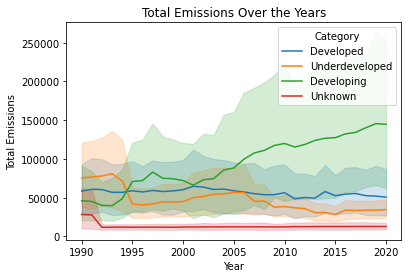

In [37]:
sns.lineplot(data=merged_df, x="Year", y="total_emission", hue="Category")
plt.title('Total Emissions Over the Years')
plt.ylabel('Total Emissions')
plt.show()

## Top 10 Developing Countries with the Highest Urban Population (2020)
The bar plot shows the top 10 developing countries with the highest urban population as of 2020, indicating rapid urbanisation in these regions.

In [ ]:
merged_df['Urban population in Millions'] = merged_df['Urban population'] / 1000000
top_10_developing = (merged_df[(merged_df['Category'] == 'Developing') & (merged_df['Year'] == 2020)].sort_values(by='Urban population', ascending=False).drop_duplicates(subset=['Country Name']).iloc[:10]) 
plt.figure(figsize=(12, 8))
sns.barplot(data=top_10_developing, x='Urban population in Millions', y='Country Name')
plt.title('Top 10 Developing Countries with the Highest Urban Population as of 2020')
plt.xlabel('Urban Population in Millions')
plt.show()

In [ ]:
top_10_developing['Urban population in Millions'] = top_10_developing['Urban population in Millions'].apply(lambda x: f'{x:.1f}M')
top_10_developing[['Country Name', 'Year', 'Urban population in Millions']]

In [38]:
merged_df.to_csv('merged.csv', index=False)  